# Theoretical Background
$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
$$
Consider a free atom with the atomic Hamiltonian $H_0$ with stationary eigenfunctions $\psi_n$, and corresponding eigenenergies $E_n=\hbar\omega_n$. Specifically:
$$
H_0\psi_n = E_n\psi_n
$$

Consider this atom interacting with light, which adds time-dependent terms to the overall Hamiltonian. This addition is $H'(t)$ to form the overall Hamiltonian, $H=H_0+H'(t)$ the consequences is the mixing of the above stationary eigenstates.

The eigenfunctions $\psi_n$ form a complete set, so the new overall mixed wavefunction can still be expressed as
$$
\Psi(t) = \sum_n c_n(t) \psi_n e^{-i\omega_nt}
$$
Usually, $H'(t)$ and $H_0$ do not commute, so do not share a common set of eigenfunctions.
The time-dependent Schrodinger equation (TDSE) is
$$
H\Psi(t) = i\hbar \frac{\partial \Psi(t)}{\partial t}
$$
Substituting these equations into each other will lead to equations for the coefficients $c_n$. Bra-ket notation will be used for simplicity, with $\psi_n = \ket{n}$
$$
(H_0+H'(t))(\sum_n c_n(t) \ket{n} e^{-i\omega_nt}) = i\hbar \frac{\partial}{\partial t} (\sum_n c_n(t) \ket{n} e^{-i\omega_nt})
$$
Product rule on time derivative, and applying $H_0$
$$
\sum_n \hbar \omega_n c_n(t) \ket{n} e^{-i\omega_nt} + H'(t)\sum_n c_n(t) \ket{n} e^{-i\omega_nt} = i\hbar \sum_n \ket{n} (-i\omega_n c_n(t) + \dot{c}_n(t)) e^{-i\omega_nt}
$$
Cancel out matching sum
$$
H'(t)\sum_n c_n(t) \ket{n} e^{-i\omega_nt} = i\hbar \sum_n \ket{n} \dot{c}_n(t) e^{-i\omega_nt}
$$
Multiply through by $\bra{m}$ (and implicitly integrating),
$$
\sum_n c_n(t) \bra{m}H'(t)\ket{n} e^{-i\omega_nt} = i\hbar \sum_n \braket{m}{n} \dot{c}_n(t) e^{-i\omega_nt}
$$
Using orthonormality of states, and rearanging, defining $w_{mn} = w_m-w_n$:
$$
\dot{c}_m(t) = \frac{1}{i\hbar} \sum_n c_n(t) \bra{m}H'(t)\ket{n} e^{i\omega_{mn}t}
$$
Note that this equation can be rearanged into a matrix equation that looks like the TDSE:
$$
i\hbar \frac{\partial}{\partial t} 
\begin{pmatrix}
c_0(t)\\
\vdots\\
c_m(t)
\end{pmatrix}
= 
\begin{pmatrix}
\bra{0}H'(t)\ket{0}e^{iw_{00}t} & \dots & \bra{0}H'(t)\ket{n}e^{iw_{0n}t} \\
\vdots                          & \ddots & \vdots                          \\
\bra{n}H'(t)\ket{0}e^{iw_{n0}t} & \dots & \bra{n}H'(t)\ket{n}e^{iw_{nn}t} \\
\end{pmatrix}
\begin{pmatrix}
c_0(t)\\
\vdots\\
c_m(t)
\end{pmatrix}
$$
So far, we have used no approximations, this is exactly equivalent to the Schrodinger equation. From here, analytical solutions only occur in certain cases, or from applying approximations.

Finally giving a form to $\hat{H}'(t) = \bf{\hat{d}} \cdot \bf{\hat{E}}$ Where $\bf{\hat{d}}$ is the electric dipole operator, and $E = \hat{\epsilon} E_0  cos (\mathbf{k} \cdot \mathbf{r} - \omega t)$ is a plane wave.

Assuming a two level atom, with states $\ket{g}$ and $\ket{e}$ for ground and excited state, using the dipole approximation so that on-diagonal terms dissapear, yields two coupled differential equations.
$$
i\hbar\dot{c}_g(t) = c_e(t) \bra{g}\mathbf{\hat{d}}\cdot\mathbf{\hat{E}}\ket{e} e^{i\omega_{ge}t}
$$
$$
i\hbar\dot{c}_e(t) = c_g(t) \bra{e}\mathbf{\hat{d}}\cdot\mathbf{\hat{E}}\ket{g} e^{-i\omega_{ge}t}
$$
Inserting the definition of $\mathbf{\hat{E}}$ gives an important parameter, the Rabi Frequency
$$
\Omega = \frac{E_0}{\hbar}\bra{e}\mathbf{\hat{d}}\cdot\mathbf{\hat{\epsilon}}\ket{g}
$$
Leaving the following differential equations (also expanding the cos in exponential form):
$$
i\hbar\dot{c}_g(t) = c_e(t) \frac{\hbar}{2} \Omega^* (e^{i(\omega-\omega_0)t}+e^{-i(\omega+\omega_0)t})
$$
$$
i\hbar\dot{c}_e(t) = c_g(t) \frac{\hbar}{2} \Omega (e^{-i(\omega-\omega_0)t}+e^{i(\omega+\omega_0)t})
$$
We will now use the 'Rotating Wave Approximation' to ignore terms like $e^{i(\omega+\omega_0)t}$. Defining a new 'detuning' parameter $\Delta = w-w_0$ the coupled equations can now be written:
$$
i\hbar\dot{c}_g(t) = c_e(t) \frac{\hbar}{2} \Omega^* e^{i \Delta t}
$$
$$
i\hbar\dot{c}_e(t) = c_g(t) \frac{\hbar}{2} \Omega e^{-i \Delta t}
$$
Making the rotating frame transformation simplifies the equations. $\tilde{c}_e(t) := c_e(t)e^{i\Delta t}$

# Import appropriate modules

In [136]:
import numpy as np
from numpy.linalg import eigh
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

import scipy.constants
from scipy.special import sph_harm

from sympy.physics.wigner import wigner_3j

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter, MultipleLocator
from matplotlib import colors

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.figsize'] = (4, 3.5)
plt.rcParams['figure.dpi'] = 200
plt.rc('text.latex', preamble=r'\usepackage[T1]{fontenc}\usepackage{cmbright}')

%matplotlib widget
%config InlineBackend.figure_format = 'retina'

# Define constants

In [135]:
# Physical Constants
H_BAR = scipy.constants.hbar

# Analytic 2-level

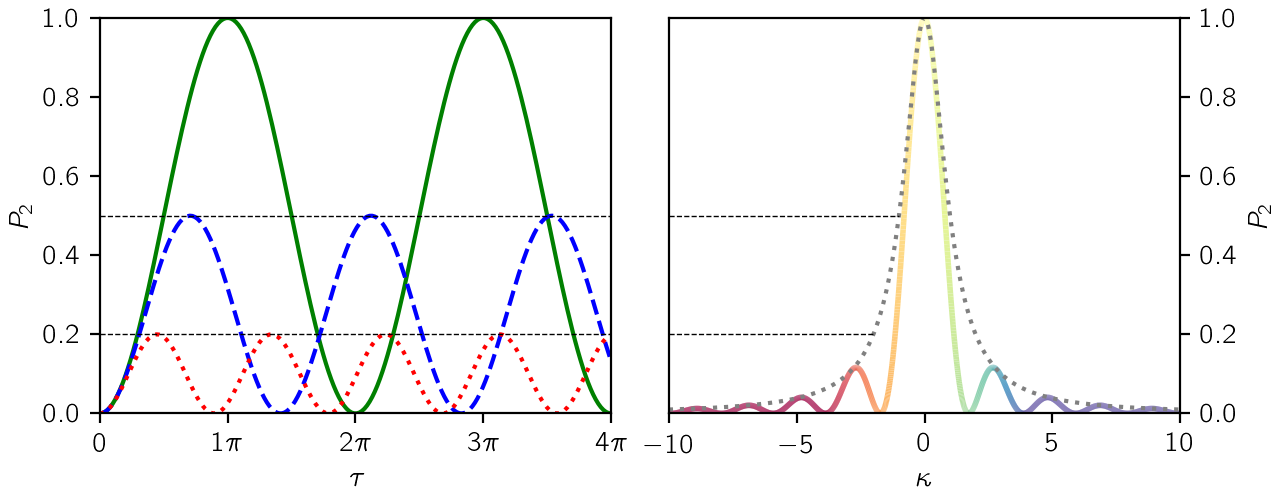

In [127]:
fig, (ax_l,ax_r) = plt.subplots(1,2,figsize=(6.4,2.5),constrained_layout=True)

t = np.linspace(0,4*np.pi,200)
cmap = plt.get_cmap('Spectral')

ax_l.plot(t,1/(1+0**2)*np.sin(np.sqrt(1+0**2)*t*0.5)**2,c='g',alpha=1)
ax_l.plot(t,1/(1+1**2)*np.sin(np.sqrt(1+1**2)*t*0.5)**2,c='b',linestyle='dashed',alpha=1)
ax_l.plot(t,1/(1+2**2)*np.sin(np.sqrt(1+2**2)*t*0.5)**2,c='r',linestyle='dotted',alpha=1)
    
ax_l.set_xlim(0,4*np.pi)
ax_l.set_ylim(0,1)
ax_l.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax_l.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_l.set_xlabel(r'$\tau$')
ax_l.set_ylabel(r'$P_2$')


k = np.linspace(-10,10,2000)

from matplotlib.collections import LineCollection
# Create data
x = k
y = 1/(1+k**2)*np.sin(np.sqrt(1+k**2)*np.pi*0.5)**2
cmapval = ((k[:-1]/8)+0.5)

# cmap = plt.get_cmap('coolwarm')
colors_here = [cmap(cv) for cv in cmapval]
# colors = [[c[0],c[1],c[2],1] for c in colors]
# Create a set of line segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a LineCollection object
lc = LineCollection(segments, colors=colors_here, lw=2)
ax_r.add_collection(lc)


# ax_r.plot(k,1/(1+k**2)*np.sin(np.sqrt(1+k**2)*np.pi*0.5)**2,'blue')


ax_r.plot(k,1/(1+k**2),color='grey', linestyle='dotted')
ax_r.yaxis.tick_right()
ax_r.yaxis.set_label_position("right")

ax_l.axhline(0.5, lw=0.5, linestyle='dashed', c='k')
ax_r.axhline(0.5,xmin=0, xmax=0.45, lw=0.5, linestyle='dashed', c='k')

ax_l.axhline(0.2, lw=0.5, linestyle='dashed', c='k')
ax_r.axhline(0.2,xmin=0, xmax=0.40, lw=0.5, linestyle='dashed', c='k')
    
ax_r.set_xlim(-10,10)
ax_r.set_ylim(0,1)

ax_r.set_xlabel(r'$\kappa$')
ax_r.set_ylabel(r'$P_2$')

fig.savefig('../images/2-level-rabi.pdf')

# Analytic 4-State loop

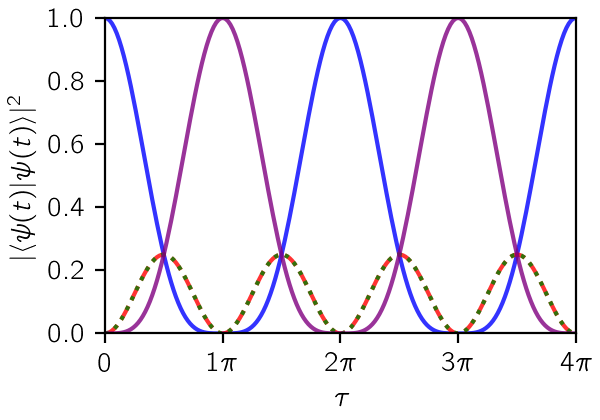

In [128]:
fig, ax = plt.subplots(1,figsize=(3.0,2.1),constrained_layout=True)

t = np.linspace(0,4*np.pi,200)

ax.plot(t,np.cos(t/2)**4,'b',alpha=0.8)
ax.plot(t,np.sin(t)**2/4,'r--',alpha=0.8)
ax.plot(t,np.sin(t)**2/4,'g:',alpha=0.8)
ax.plot(t,np.sin(t/2)**4,'purple',alpha=0.8)
    
ax.set_xlim(0,4*np.pi)
ax.set_ylim(0,1)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$|\langle\psi(t)|\psi(t)\rangle|^2$')

fig.savefig("../images/4-loop-population.pdf")

# Analytic 3-State

In [220]:
example_points = [(2, 1, 1,  4), (6, 1, 1,  4),
                  (2, 4, 1,  4), (6, 1, 0.5,  4),
                  (0.1,  1, 1,  4), (6, 1,    0,  4),
                  # (0.5,  1, 1,  4),     (0.5,      0.2,  1,  4),
                   (0.1,  0.5, 1,  4),     (100,  0.5,  1,  4),
                 ]

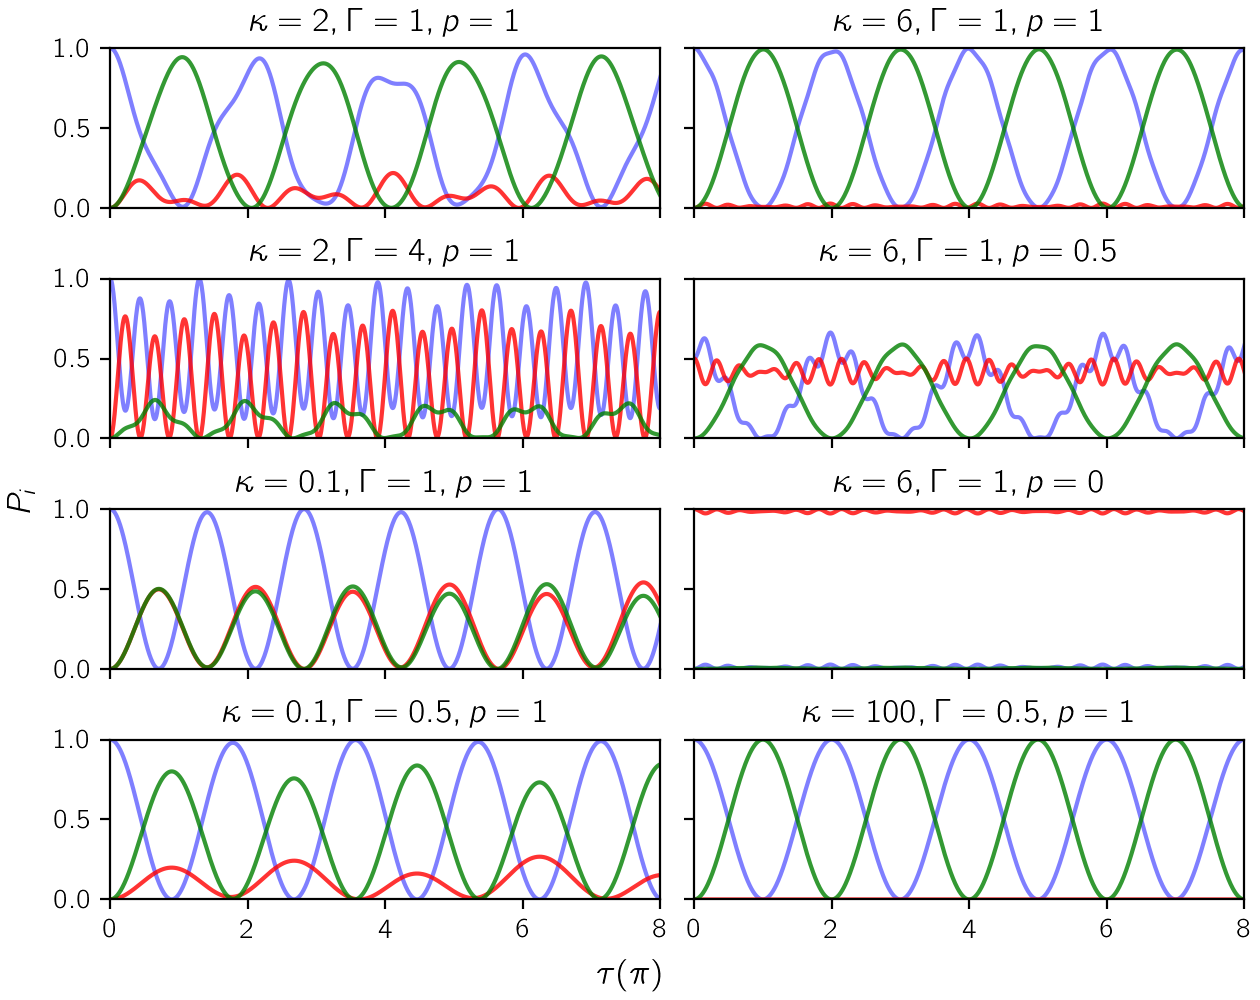

In [221]:
fig, axs = plt.subplots(4,2,figsize=(6.3,5),constrained_layout=True,sharey=True,sharex=True)

for i,(k,g,p,periods) in enumerate(example_points):
    coeff = [1, 2*k, -(1+g**2),-2*k]
    roots = np.roots(coeff)
    a=roots[0]
    b=roots[1]
    c=roots[2]
    # print(a,b,c)
    
    def d(mj,mk):
        return (mj-mk)*( ((2*k+mj)*(2*k+mk)) * (1-p)**(1/2) - 2*g*k*p**(1/2))

    coefficients = np.array([
        [(a)*(2*k+a)*d(b,c),(b)*(2*k+b)*d(c,a),(c)*(2*k+c)*d(a,b)],
        [(2*k+a)*d(b,c),(2*k+b)*d(c,a),(2*k+c)*d(a,b)],
        [(a)*(g)*d(b,c),(b)*(g)*d(c,a),(c)*(g)*d(a,b)],
    ])
    # print(coefficients)
    
    normalisation = 1/(2*g*k*(a-b)*(c-a)*(b-c))**2

    averages = np.sum(coefficients**2,1)

    beatAmplitudes=2*np.array([
        [coefficients[0,0]*coefficients[0,1],coefficients[0,2]*coefficients[0,0],coefficients[0,1]*coefficients[0,2]],
        [coefficients[1,0]*coefficients[1,1],coefficients[1,2]*coefficients[1,0],coefficients[1,1]*coefficients[1,2]],
        [coefficients[2,0]*coefficients[2,1],coefficients[2,2]*coefficients[2,0],coefficients[2,1]*coefficients[2,2]]
    ])

    beatFrequencies = np.array([a-b,c-a,b-c])/2

    MAX_T = 2*np.pi*periods
    t=np.linspace(0,MAX_T,1000)
    coses = np.cos(t[:,None] * beatFrequencies[None,:])

    prob = normalisation * np.array([
        averages[0]+beatAmplitudes[0,0]*coses[:,0]+beatAmplitudes[0,1]*coses[:,1]+beatAmplitudes[0,2]*coses[:,2],
        averages[1]+beatAmplitudes[1,0]*coses[:,0]+beatAmplitudes[1,1]*coses[:,1]+beatAmplitudes[1,2]*coses[:,2],
        averages[2]+beatAmplitudes[2,0]*coses[:,0]+beatAmplitudes[2,1]*coses[:,1]+beatAmplitudes[2,2]*coses[:,2]
    ])

    ax=axs.flatten()[i]

    line_width=1.5
    ax.plot(t/np.pi,prob[0],c='blue',lw=line_width,alpha=0.5)
    ax.plot(t/np.pi,prob[2],c='red',lw=line_width,alpha=0.8)
    ax.plot(t/np.pi,prob[1],c='green',lw=line_width,alpha=0.8)

    ax.set_xlim(0,MAX_T/np.pi)
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.set_ylim(0,1)
    ax.set_title(f'$\kappa={k},\Gamma={g},p={p}$')

    # ax.set_xlabel(r'$\tau (\pi)$')
    # ax.set_ylabel(r'$P_i$')
fig.supxlabel(r'$\tau (\pi)$')
fig.supylabel(r'$P_i$')


fig.savefig('../images/8-panel-3-state-evolution.pdf')

In [196]:
def twice_average_fidelity(k,g):
    return ((1 + g**2)**2 + 8*k**2*(-1 + 2*g**2) + 16*k**4)/((1 + g**2)**3 + (-8 + 20*g**2 + g**4)*k**2 + 16*k**4)

def Power(base,exp):
    return base**exp

def Sqrt(x):
    return x**(0.5)

def half_of_res(k,g,p):
    return ((g*(Power(g,3)*(5 - 7*p) + g*(4 + 4*Power(k,2)*(4 - 7*p) - 5*p) + 
       Power(g,5)*(1 - 2*p) + 12*Power(g,2)*k*Sqrt((1 - p)*p) + 
       2*Power(g,4)*k*Sqrt((1 - p)*p) + 
       8*k*(-1 + 4*Power(k,2))*Sqrt(-((-1 + p)*p))))/
   (2.*(Power(1 + Power(g,2),3) + 
       (-8 + 20*Power(g,2) + Power(g,4))*Power(k,2) + 16*Power(k,4))))

def minus_fidelity(k,g):
    return 1-((g**2 * ((1+g**2)**2 + 12*k**2))/((1+g**2)**3 + (-8 + 20*g**2 + g**4)*k**2 + 16*k**4))

def maximum_fidelity(k,g):
    phi = np.arccos((k*(18-9*g**2-8*k**2))/(3+3*g**2+4*k**2)**(3/2))/3
    
    denominator = 54*((1+g**2)**3+(-8+20*g**2+g**4)*k**2+16*k**4)
    
    numerator = (
                 36*(g**4+(1-4*k**2)**2+2*g**2*(1+8*k**2))
               + 32*k    *(3+3*g**2+4*k**2)**(3/2) *np.cos(phi)
               - 64*k**2 *(3+3*g**2+4*k**2)        *np.cos(2*phi) 
               -  4      *(3+3*g**2+4*k**2)**2     *np.cos(4*phi)
                )
    
    return numerator/denominator

k_exp_range = (-3,3)
g_exp_range = (-3,3)

ks = np.logspace(*k_exp_range,1000)
gs = np.logspace(*g_exp_range,1000)

ks, gs = np.meshgrid(ks,gs)

twice_average_fidelities = twice_average_fidelity(ks,gs)
minus_fidelities = minus_fidelity(ks,gs)
# maximum_fidelities = maximum_fidelity(ks,gs)
# maximum_fidelities = np.abs((1-(gs/ks)**2))
# perturbation_fidelities = 1-(gs**2)*((1-2*1*ks+ks**2)/(1-2*ks**2+ks**4))

g2 = gs**2
k2 = ks**2
expansion_fidelities = 1 - (4*g2+g2**2)/(16*k2) #- (g2)/(4*k2) - (g2**2)/(16*k2)# - (3*g2)/(16*k2**2) + (5*g2**2)/(32*k2**2)
# expansion_fidelities = 1 - (g2/(k2))

half_of_res_plot = half_of_res(ks,gs,0.50)

difference = (np.log10(1-twice_average_fidelities+1e-9)-np.log10(1-expansion_fidelities+1e-9))#/np.log10(1-twice_average_fidelities+1e-9)




In [197]:
colors

<module 'matplotlib.colors' from '/Users/tom/Code/project/diatom-notebooks/venv/lib/python3.10/site-packages/matplotlib/colors.py'>

/var/folders/lt/2lfqhmyn1n9bbwg1sqf3zzwc0000gn/T/ipykernel_2106/2825617850.py:19: UserWarning: The following kwargs were not used by contour: 'edgecolor', 'linewidth'
  cf = ax.contourf(ks,gs,normalised_fidelies,40,cmap='RdYlGn',norm=Norm,alpha=1,zorder=10,edgecolor='face',linewidth=0.2)


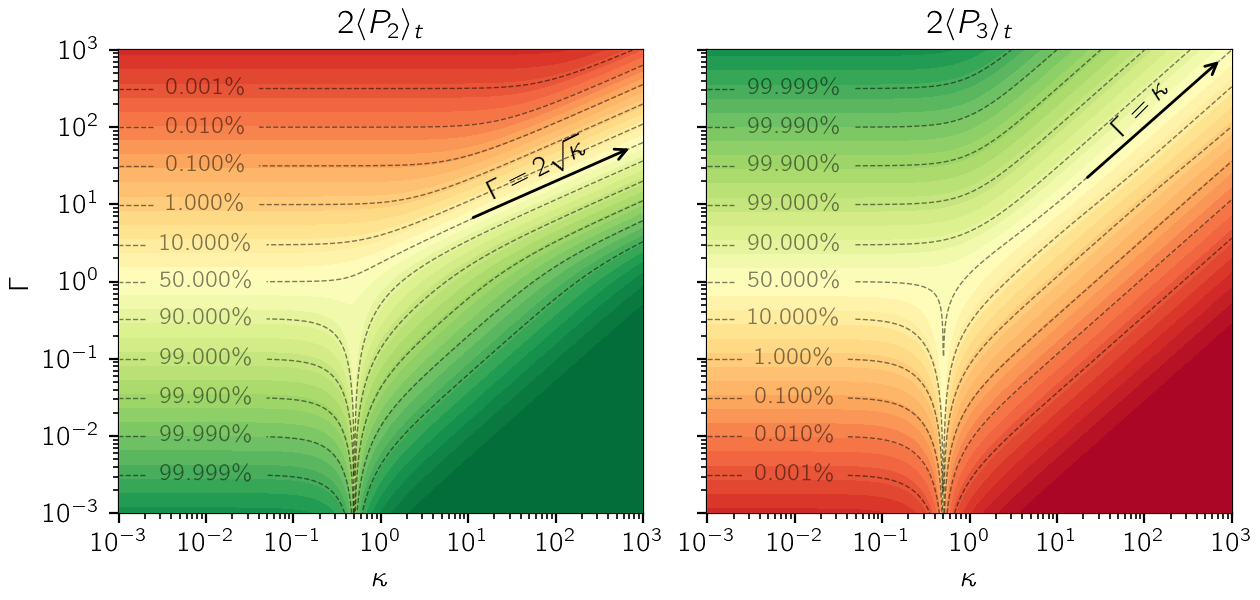

In [252]:
fig, (axl,axm) = plt.subplots(1,2,figsize=(6.3,3),sharey=True,sharex=True,constrained_layout=True)

Norm  = colors.Normalize(vmin=0, vmax=1, clip=True)

noted_levels=[0.00001,0.0001,0.001,0.01,0.1,0.5,0.9,0.99,0.999,0.9999,0.99999]
# noted_levels=[0.9,0.99,0.999]

axl.set_ylabel('$\Gamma$')
for ax, fidelities,title in [(axl,twice_average_fidelities,r"$2\langle P_{2}\rangle_t$"),(axm,1-minus_fidelities,r"$2\langle P_{3}\rangle_t$")]:#,(axr,np.abs(twice_average_fidelities-minus_fidelities),"expansion")]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(10**k_exp_range[0],10**k_exp_range[1])
    ax.set_ylim(10**g_exp_range[0],10**g_exp_range[1])
    ax.set_xlabel('$\kappa$')

    k=7
    normalised_fidelies = (np.log10(1/(1 - (1 - 10**(-k))*fidelities - 0.5*10**(-k)) - 1))/(2*np.log10(2*10**k - 1)) + 1/2
    cf = ax.contourf(ks,gs,normalised_fidelies,11,cmap='RdYlGn',norm=Norm,alpha=1,zorder=-10)
    cf = ax.contourf(ks,gs,normalised_fidelies,40,cmap='RdYlGn',norm=Norm,alpha=1,zorder=10,edgecolor='face',linewidth=0.2)
    
    CS1 = ax.contour(ks,gs,fidelities,noted_levels, colors='k',linestyles='dashed',linewidths=0.5,alpha=0.5,zorder=20)

    fmt = {}
    strs = [f"{n*100:.3f}\%" for n in noted_levels]
    for l, s in zip(CS1.levels, strs):
        fmt[l] = s

    labelpositions = [(0.01,np.sqrt(1/n-1)) for n in noted_levels]
    ax.clabel(CS1, CS1.levels, fmt=fmt,manual=labelpositions,fontsize='small')
    ax.set_title(title)
    
    # ax.axhline(2**1.5,zorder=50,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
    # ax.axvline(0.5,zorder=50,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
    
    # ax.plot([10**k_exp_range[0],10**k_exp_range[1]],[2*(10**k_exp_range[0])**0.5,2*(10**k_exp_range[1])**0.5],zorder=100,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
    # ax.plot([10,10**k_exp_range[1]],[2**(2/3)*(10)**(2/3),2**(2/3)*(10**k_exp_range[1])**(2/3)],zorder=100,color='black',linewidth=1,dashes=(3,2),alpha=0.7)
    # ax.plot([10**k_exp_range[0],10**k_exp_range[1]],[10**k_exp_range[0],10**k_exp_range[1]],zorder=100,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)

    # ax.arrow(astart, 2**(2/3)*(astart)**(2/3), aend-astart, 2**(2/3)*(aend)**(2/3)-2**(2/3)*(astart)**(2/3),zorder=100,head_width=0.05, head_length=0.1, fc='k', ec='k')
    
astart = 10
aend = 800
axl.annotate(r"",
        xy=(astart, 2*(astart)**(1/2)), xycoords='data',
        xytext=(aend, 2*(aend)**(1/2)), textcoords='data',
        arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),
           zorder=300)

axl.text(15, 2*(15)**(1/2)+2, r"$\Gamma=2\sqrt{\kappa}$", va='bottom', zorder=300,rotation=26.5)


axm.annotate(r"",
        xy=(20, 20), xycoords='data',
        xytext=(800, 800), textcoords='data',
        arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),
           zorder=300)

axm.text(40, 40+25, r"$\Gamma=\kappa$", va='bottom', zorder=300,rotation=45)


#     for k,g,_ in example_points:
#         ax.plot(k, g, 'ko',markersize=5,zorder=100,mfc='none')





fig.savefig('../images/3-level-phase.pdf')

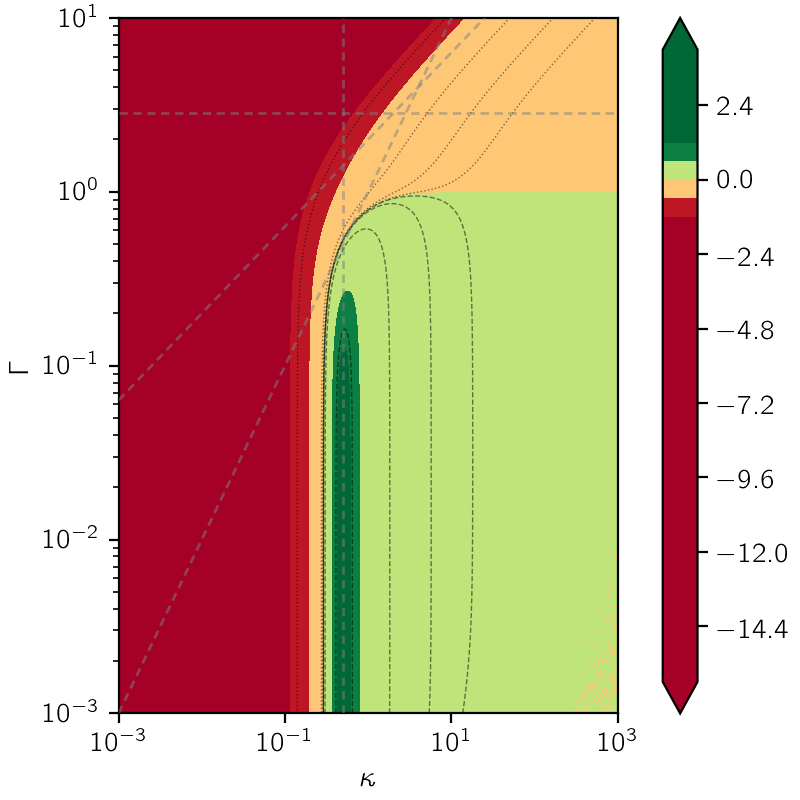

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4),constrained_layout=True)

# Norm  = colors.Normalize(vmin=0, vmax=1, clip=True)

# noted_levels=[0.00001,0.0001,0.001,0.01,0.1,0.5,0.9,0.99,0.999,0.9999,0.99999]
# noted_levels=[0.9,0.99,0.999]

# print(difference)


ax.set_ylabel('$\Gamma$')
ax.set_xlabel('$\kappa$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**k_exp_range[0],10**k_exp_range[1])
ax.set_ylim(10**g_exp_range[0],10)
cf = ax.contourf(ks,gs,difference,40,cmap='RdYlGn',alpha=1,vmin=-1,vmax=1, extend='both')
CS1 = ax.contour(ks,gs,difference,[0.001,0.01,0.1,1], colors='k',linestyles='dashed',linewidths=0.5,alpha=0.5,zorder=20)
CS1 = ax.contour(ks,gs,difference,[-1,-0.1,-0.01,-0.001], colors='k',linestyles='dotted',linewidths=0.5,alpha=0.5,zorder=20)

ax.axhline(2**1.5,zorder=50,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
ax.axvline(0.5,zorder=50,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
ax.plot([10**k_exp_range[0],10**k_exp_range[1]],[2*(10**k_exp_range[0])**0.5,2*(10**k_exp_range[1])**0.5],zorder=100,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
ax.plot([10**k_exp_range[0],10**k_exp_range[1]],[10**k_exp_range[0],10**k_exp_range[1]],zorder=100,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
cbar = fig.colorbar(cf)

# fig.savefig('../images/3-level-phase-error.pdf')

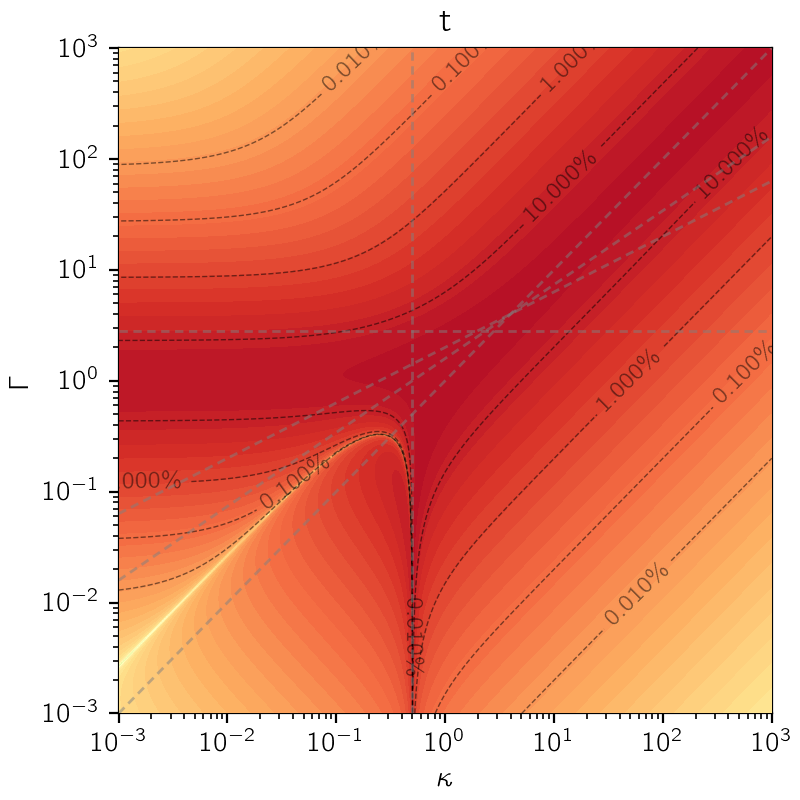

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4),constrained_layout=True)

Norm  = colors.Normalize(vmin=0, vmax=1, clip=True)

# noted_levels=[0.00001,0.0001,0.001,0.01,0.1,0.5,0.9,0.99,0.999,0.9999,0.99999]
noted_levels=[0.0001,0.001,0.01,0.1]

title = "t"
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**k_exp_range[0],10**k_exp_range[1])
ax.set_ylim(10**g_exp_range[0],10**g_exp_range[1])
ax.set_xlabel('$\kappa$')
ax.set_ylabel('$\Gamma$')

k=10
normalised_fidelies = -np.log10(np.abs(half_of_res_plot)+1e-15)/15

cf = ax.contourf(ks,gs,normalised_fidelies,40,cmap='RdYlGn',norm=Norm,alpha=1,zorder=10)
CS1 = ax.contour(ks,gs,half_of_res_plot,noted_levels, colors='k',linestyles='dashed',linewidths=0.5,alpha=0.5,zorder=20)

fmt = {}
strs = [f"{n*100:.3f}\%" for n in noted_levels]
for l, s in zip(CS1.levels, strs):
    fmt[l] = s

# labelpositions = [(0.01,np.sqrt(1/n-1)) for n in noted_levels]
ax.clabel(CS1, CS1.levels, fmt=fmt,fontsize='small')
ax.set_title(title)

ax.axhline(2**1.5,zorder=50,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
ax.axvline(0.5,zorder=50,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)

ax.plot([10**k_exp_range[0],10**k_exp_range[1]],[2*(10**k_exp_range[0])**0.5,2*(10**k_exp_range[1])**0.5],zorder=100,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
ax.plot([10**k_exp_range[0],10**k_exp_range[1]],[2**(2/3)*(10**k_exp_range[0])**(2/3),2**(2/3)*(10**k_exp_range[1])**(2/3)],zorder=100,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
ax.plot([10**k_exp_range[0],10**k_exp_range[1]],[10**k_exp_range[0],10**k_exp_range[1]],zorder=100,color='grey',linewidth=1,dashes=(3,2),alpha=0.5)
    

fig.savefig('../images/3-level-phase.pdf')

In [ ]:
twice_average_fidelities[999,0]

In [ ]:
maximum_fidelities[999,0]

Text(0.5, 0, '$\\kappa$')

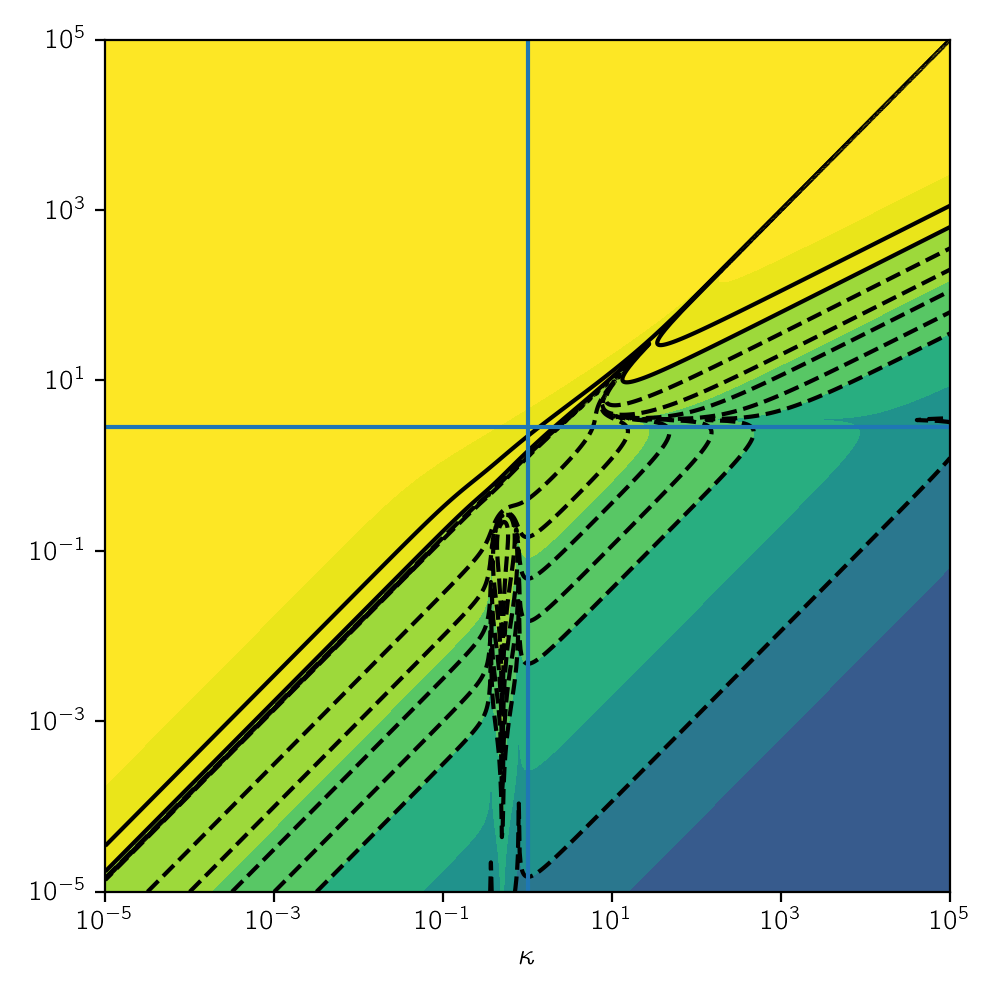

In [109]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**k_exp_range[0],10**k_exp_range[1])
ax.set_ylim(10**g_exp_range[0],10**g_exp_range[1])

error = np.abs((twice_average_fidelities-maximum_fidelities)/twice_average_fidelities)



# norm_c = colors.Normalize(vmin=-1, vmax=1)
ax.contourf(ks,gs,np.log10(error+1e-15),20,norm=colors.Normalize(vmin=-20,vmax=2,clip=True))
ax.contour(ks,gs,np.log10(error+1e-15),[-10,-5,-4,-3,-2,-1,0,1],colors='black')
# fig.colorbar()

ax.axhline(2**1.5)
ax.axvline(1)


ax.set_xlabel('$\kappa$')

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**k_exp_range[0],10**k_exp_range[1])
ax.set_ylim(10**g_exp_range[0],10**g_exp_range[1])

deltas = np.linspace()

np.pi



# norm_c = colors.Normalize(vmin=-1, vmax=1)
ax.contourf(ks,gs,np.log10(error+1e-15),20,norm=colors.Normalize(vmin=-20,vmax=2,clip=True))
ax.contour(ks,gs,np.log10(error+1e-15),[-10,-5,-4,-3,-2,-1,0,1],colors='black')
# fig.colorbar()

ax.axhline(2**1.5)
ax.axvline(1)


ax.set_xlabel('$\kappa$')

# Exact Numeric 2-level

Taking the general exact matrix equation
$$
i\hbar \frac{\partial}{\partial t} 
\begin{pmatrix}
c_0(t)\\
\vdots\\
c_m(t)
\end{pmatrix}
= 
\begin{pmatrix}
\bra{0}H'(t)\ket{0}e^{iw_{00}t} & \dots & \bra{0}H'(t)\ket{n}e^{iw_{0n}t} \\
\vdots                          & \ddots & \vdots                          \\
\bra{n}H'(t)\ket{0}e^{iw_{n0}t} & \dots & \bra{n}H'(t)\ket{n}e^{iw_{nn}t} \\
\end{pmatrix}
\begin{pmatrix}
c_0(t)\\
\vdots\\
c_m(t)
\end{pmatrix}
$$

And substituting in for $\hat{H}'(t) = \bf{\hat{d}} \cdot \bf{\hat{E}}$ Where $\bf{\hat{d}}$ is the electric dipole operator, and $E = \hat{\epsilon} E_0  cos (- \omega t)$ is a plane wave.

Each matrix element becomes
$$
H_{ij} = \frac{E_0}{2} \bra{i} \mathbf{\hat{d}} \cdot \mathbf{\hat{\epsilon}} \ket{j} (e^{i(w_{ij}-w)t} + e^{i(w_{ij}+w)t})
$$
Breaking this up into a Hadamard product (pairwise multiplication) of a time-independent and a time-dependent part
$$
H_{ij} = \frac{\hbar}{2} \Omega_{ij} \odot T_{ij}
$$
Where 
$$
\Omega_{ij} = \frac{E_0}{\hbar} \bra{i} \mathbf{\hat{d}} \cdot \mathbf{\hat{\epsilon}} \ket{j}
$$
and
$$
T_{ij} = e^{i(w_{ij}-w)t} + e^{i(w_{ij}+w)t}
$$

In [ ]:
fig, ax = plt.subplots()


driving = 2
angular = [0, driving]

# Construct coupling matrix
coupling = np.matrix([[0, 1],
                      [1, 0]], dtype=np.cdouble)

# Construct
T_MAX = 50
T_STEPS = 5000
times, DT = np.linspace(0, T_MAX, num=T_STEPS, retstep=True)

Ts = []
for t in times:
    T  = np.zeros((2,2), dtype=np.cdouble)
    for i in range(2):
        for j in range(2):
            T[i,j] = np.exp((1j)*(angular[i]-angular[j]-driving)*t) + np.exp((1j)*(angular[i]-angular[j]+driving)*t)
    Ts.append(T)
Ts = np.array(Ts)

# Construct Hamiltonians
H = np.array([H_BAR/2 * np.multiply(coupling, T) for T in Ts])


# Move State

finals = []
state = np.array([0,1]) # initial state

for i in range(T_STEPS):
    unitary = scipy.linalg.expm(-(1j)*(DT/H_BAR)*H[i])
    state = np.matmul(unitary,state)
    finals.append(np.abs(state[0])**2)

    
ax.set_xlim(0,T_MAX)
ax.set_ylim(0,1)
ax.set_xlabel("t (s)")
ax.set_ylabel("$|c_e|^2$")

ax.plot(times, finals)

# Exact Numeric 2-level system

```
---- FIRST + DETUNING
---- FIRST
 ^
 |
 |
 |
---- 0
```

time_step: 3.683363918976348e-06 Driving Period:  0.00025856729659175253 ratio (hope<1): 0.014245281470347537


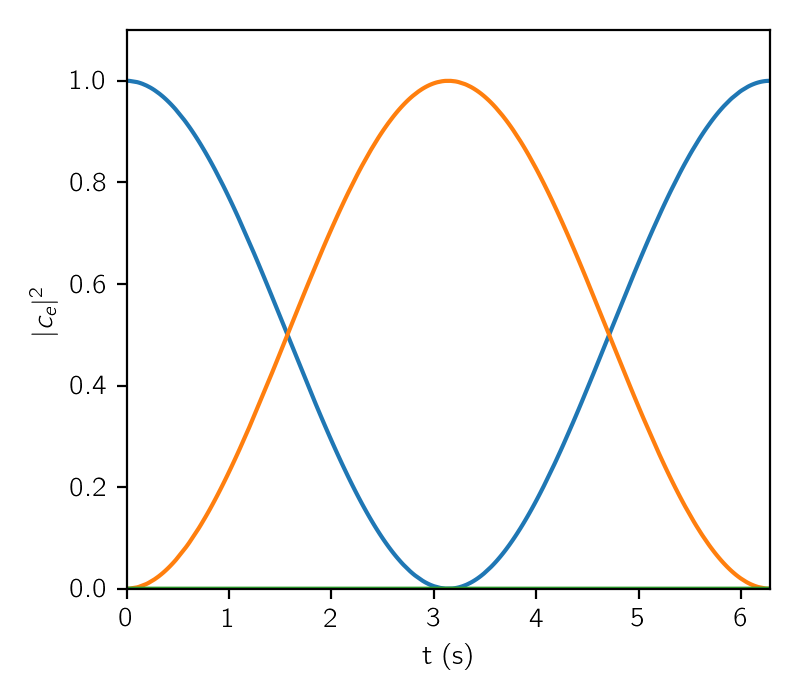

In [219]:
fig, ax = plt.subplots()

# 10000,200

INITIAL_STATE = 0
FIRST = 2.43e4
DETUNING = 40
angular = [0, FIRST, FIRST+DETUNING]
N_STATES = len(angular)

# Construct coupling matrix
global_coupling = 1e0
coupling = global_coupling*np.array([
        [0,1,0.1],
        [1,0,0],
        [0.1,0,0]
        ])

driving = angular[1]-angular[0]

# Construct
T_MAX = 2*np.pi / global_coupling
T_STEPS = 1705829
times, DT = np.linspace(0, T_MAX, num=T_STEPS, retstep=True)
print("time_step:", DT, "Driving Period: ",2*np.pi/driving, "ratio (hope<1):", DT*driving/(2*np.pi))

Ts = []
for t in times:
    T  = np.zeros((N_STATES,N_STATES), dtype=np.cdouble)
    for i in range(N_STATES):
        for j in range(N_STATES):
            T[i,j] = np.exp((1j)*(angular[i]-angular[j]-driving)*t) + np.exp((1j)*(angular[i]-angular[j]+driving)*t)
    Ts.append(T)
Ts = np.array(Ts)

# Construct Hamiltonians
H = np.array([H_BAR/2 * np.multiply(coupling, T) for T in Ts])


# Move State

finals = []

state = np.zeros(N_STATES) # initial state
state[INITIAL_STATE] = 1#(0.501)**(1/2)
# state[2] = (0.499)**(1/2)


for i in range(T_STEPS):
    unitary = scipy.linalg.expm(-(1j)*(DT/H_BAR)*H[i])
    state = np.matmul(unitary,state)
    finals.append(np.abs(state)**2)

    
ax.set_xlim(0,T_MAX)
ax.set_ylim(0,1.1)
ax.set_xlabel("t (s)")
ax.set_ylabel("$|c_e|^2$")

ax.plot(times, finals);
# fig.show()

# n-level system

```
---- 1e13 + 1e9 + 1e7
---- 1e13 + 1e9


---- 1e13 + 1e7
---- 1e13
 ^
 |
 |
 |
---- 0
```

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))

INITIAL_STATE = 0
#angular = [0, 1e13, 1e13+1e6]#, 1e13+1e9, 1e13+1e9+1e7]
angular = [0., 6.15845642e9, 6.15794005e9, 6.15994033e9, 6.15963301e9, 6.15925873e9, 6.15994076e9, 6.15963347e9, 6.15994118e9, 6.16073900e9]
N_STATES = len(angular)

# Construct coupling matrix
global_coupling = (2*np.pi*4e4)
coupling = global_coupling*(np.ones(N_STATES)-np.eye(N_STATES))

driving = 6.15845642e9

# Construct
T_MAX = 2*np.pi / global_coupling
T_STEPS = 13421
times, DT = np.linspace(0, T_MAX, num=T_STEPS, retstep=True)

Ts = []
for t in times:
    T  = np.zeros((N_STATES,N_STATES), dtype=np.cdouble)
    for i in range(N_STATES):
        for j in range(N_STATES):
            T[i,j] = np.exp((1j)*(angular[i]-angular[j]-driving)*t) + np.exp((1j)*(angular[i]-angular[j]+driving)*t)
    Ts.append(T)
Ts = np.array(Ts)

# Construct Hamiltonians
H = np.array([H_BAR/2 * np.multiply(coupling, T) for T in Ts])


# Move State

finals = []

state = np.zeros(N_STATES) # initial state
state[INITIAL_STATE] = 1


for i in range(T_STEPS):
    unitary = scipy.linalg.expm(-(1j)*(DT/H_BAR)*H[i])
    state = np.matmul(unitary,state)
    finals.append(np.abs(state)**2)

    
ax.set_xlim(0,T_MAX*1e6)
ax.set_ylim(0,1)
ax.set_xlabel("$t (\mu s)$")
ax.set_ylabel("$|c_i|^2$")

ax.plot(times*1e6, finals);
# fig.show()

# Fast

In [205]:
def peakProbabilities(angular, coupling, pulse_time=100e-6, initial=0, intended=1, time_steps=10000, debug=False):
    """
    angular - 1D numpy array of angular frequencies (via w=E/H_BAR)
    coupling - 2D numpy coupling (symmetric) matrix between states
    pulse_time - intended 2-Pi pulse duration in seconds
    initial - index of initial state in angular
    intended - index of intended state in angular
    time_steps - number of timesteps to simulate
    """

    # Pick incoming radiation parameters
    driving = angular[intended] - angular[initial] 
    E_0 = np.abs((2*np.pi*H_BAR) / (coupling[initial, intended] * pulse_time))

    # Make times
    times, DT = np.linspace(0, pulse_time, num=time_steps, retstep=True)# [ti], []

    # Construct 'kinetic' time step operator (Matrix Diagonal)
    T_OP_DIAG = np.exp(-(1j) * angular * DT/2 )

    # Construct potential fixed part time step operator 
    ORDER = 4
    V_TI_M = (-(1j)*DT/H_BAR)*E_0*coupling
    V_TI_M_POWS = np.array([np.linalg.matrix_power(V_TI_M, i)/np.math.factorial(i) for i in range(ORDER)])

    # Initial state
    N_STATES = len(angular)
    state_vector = np.zeros((N_STATES), dtype=np.cdouble)
    state_vector[initial] = 1
    max_amp_vector = np.zeros((N_STATES), dtype=np.double)
    max_amp_vector[initial] = 1
    
#     state_vectors = np.zeros((time_steps,N_STATES), dtype=np.cdouble) 
#     state_vectors[0] = state_vector
    
    V_TDS = np.cos(driving*times) #[ti]
    V_TDS_POWS = V_TDS**(np.arange(ORDER)[:,None]) #[c,ti]
    
    V_OPS = np.sum(V_TI_M_POWS[:,None,:,:]*V_TDS_POWS[:,:,None,None], axis=0) #[ti,s,s]
    DUS =  T_OP_DIAG[None,:,None] * V_OPS * T_OP_DIAG[None,None,:]

    # Run differential equation
    for t_num in range(time_steps-1):
#        V_TD = np.cos(driving*times[t_num])
#        V_TD_POWS = V_TD**np.arange(ORDER)

#        V_OP = np.sum(V_TI_M_POWS*V_TD_POWS[:,None,None], axis=0)

#        DU = T_OP_DIAG[:,None] * V_OP * T_OP_DIAG[None,:]  # = T @ V @ T
        state_vector = DUS[t_num] @ state_vector
        #state_vectors[t_num+1] = state_vector
        max_amp_vector = np.maximum(max_amp_vector, np.abs(state_vector))

    return max_amp_vector**2 #, state_vectors

In [206]:
angular = np.array([1e5,1e9,1.1e9])
coupling = np.array([[0.0, 1.0, 0.8],
                     [1.0, 0.0, 0.0],
                     [0.8, 0.0, 0.0]])

max_probabilities = peakProbabilities(angular,coupling,pulse_time=10,time_steps=10000)

print(max_probabilities)

[1.00000000e+00 9.99998914e-01 8.51274509e-06]


In [207]:
F_N = 50
F_MIN = 0.001
F_MAX = 0.05

D_N = 50
D_MIN = 0.01
D_MAX = 0.5

BASE = 1
COUPLING = np.array([[0.0, 1.0, 0.8],
                     [1.0, 0.0, 0.0],
                     [0.8, 0.0, 0.0]])

rabis = np.linspace(F_MIN,F_MAX,num=F_N)
detunings = np.linspace(D_MIN,D_MAX,num=D_N)

rabis_grid, detuning_grid = np.meshgrid(rabis,detunings)

fidelity_grid = np.zeros((D_N, F_N))

for fi in range(F_N):
    for di in range(D_N):
        fidelity_grid[di,fi] = peakProbabilities(np.array([0,BASE,BASE+detunings[di]]),COUPLING,pulse_time=1/rabis[fi],time_steps=10000)[1]

KeyboardInterrupt: 

In [ ]:
    
fig,ax = plt.subplots()

cf = ax.contourf(rabis_grid,detuning_grid/(2*np.pi),fidelity_grid,20)
fig.colorbar(cf, ax=ax)
#ax.set_xlim(F_MIN,F_MAX)
#ax.set_xscale('log')
ax.set_xlabel("Rabi Frequency $\Omega$ (Hz)")
#ax.set_xlabel("2$\pi$-Pulse Time (s)")
ax.set_ylim(D_MIN/(2*np.pi),D_MAX/(2*np.pi))
ax.set_ylabel("Detuning (Hz)")
ax.set_title("Maximum Transfer $|c_i|^2$")